In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


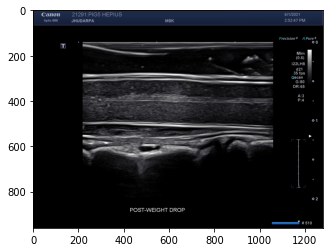

In [ ]:
import pydicom as dicom
import matplotlib.pylab as plt
import cv2

# specify your image path
image_path = '/content/gdrive/MyDrive/HEPIUS/A0020_SAG_SPINE'
x = dicom.dcmread(image_path)

plt.imshow(x.pixel_array,cmap='gray')
plt.show()

<class 'numpy.ndarray'>
(960, 1280, 3)


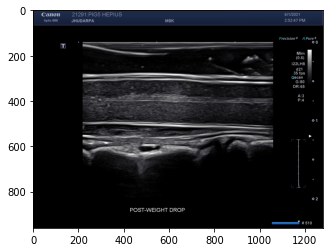

In [ ]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt

# Load the DICOM image using pydicom
dicom_image = pydicom.dcmread(image_path)

# Get the pixel array from the DICOM image
image = dicom_image.pixel_array

print(type(image))
print(image.shape)

# Plot the thresholded image
plt.imshow(image, cmap="gray")
plt.show()

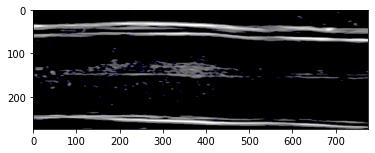

In [ ]:
start_row, start_col = 250, 250
end_row, end_col = 525, 1025
dicom_image = pydicom.dcmread(image_path)
image = dicom_image.pixel_array
cropped_image = image[start_row:end_row, start_col:end_col]

threshold = 80
cropped_image[cropped_image < threshold] = 0
plt.imshow(cropped_image, cmap="gray")
plt.show()
# img = cropped_image

In [ ]:
from skimage.transform import resize

resized_image = cropped_image[:,:,0]

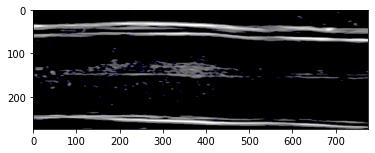

In [ ]:
plt.imshow(cropped_image)

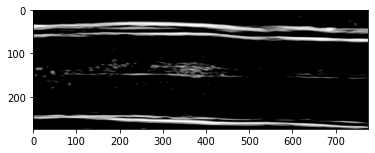

In [ ]:
image_eq = cv2.equalizeHist(resized_image)
plt.imshow(image_eq, cmap='gray')

In [ ]:
# img_eq = cv2.equalizeHist(image_eq)
# plt.imshow(img_eq, cmap="gray")

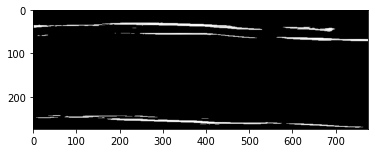

In [ ]:
# threshold = 200
# image_eq[image_eq < threshold] = 0
# plt.imshow(image_eq, cmap="gray")
# plt.show()

In [ ]:
# from skimage import color

# grayimg = color.rgb2gray(cropped_image)
# plt.imshow(grayimg, cmap='gray')

In [ ]:
# Define the parameters for Chan-Vese segmentation
lambda1 = 1
lambda2 = 1
iterations = 20000
init_level_set = "checkerboard"
dt = 0.75

In [ ]:
# Apply Chan-Vese segmentation to the image
# from skimage.segmentation import chan_vese
# print(len(image_eq.shape))
# seg = chan_vese(cropped_image, mu=0.25, lambda1=lambda1, lambda2=lambda2, tol=1e-3, max_iter=iterations, init_level_set=init_level_set, dt=dt)

In [ ]:
# from skimage.transform import resize

# resized_image = cropped_image[:,:,0]

In [ ]:
from skimage.segmentation import chan_vese
seg = chan_vese(resized_image, mu=0.25, lambda1=lambda1, lambda2=lambda2, tol=1e-3, max_iter=iterations, init_level_set=init_level_set, dt=dt)

In [ ]:
# print(len(resized_image.shape))

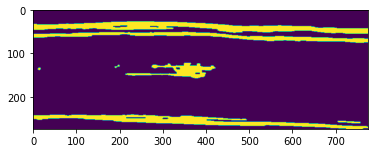

In [ ]:
plt.imshow(seg)

In [ ]:
# from skimage import measure
# labels = measure.label(seg) # Different labels are displayed

In [ ]:
# plt.imshow(labels)

In [ ]:
# print(seg)

In [ ]:
print(seg.shape)

(275, 775)


In [ ]:
import numpy
grey = numpy.ones((275,775))

In [ ]:
# print(grey)

In [ ]:
for i in range(0,275):
  for j in range(0,775):
    if seg[i][j] == False:
      grey[i][j] = 1
    else:
      grey[i][j] = 250

# print(grey)

In [ ]:
# count = 0
# for i in range(0,275):
#   for j in range(0,825):
#     if grey[i][j] != 1:
#       count = count + 1

# print(count)

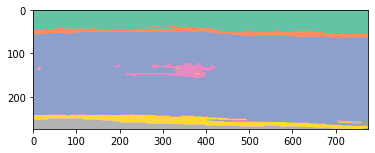

In [108]:
from skimage import measure
labels = measure.label(grey)

plt.imshow(labels, cmap = 'Set2')

2


In [ ]:
# label_count = len(np.unique(grey))

In [ ]:
# print(label_count)

In [ ]:
# uni = np.unique(grey)

In [ ]:
# print(uni)

# Active Contouring

In [ ]:
from skimage import io, filters, morphology, segmentation
from skimage.segmentation import active_contour

image_smooth = filters.gaussian(image_eq, sigma=0.05)
# image_edges = filters.sobel(cropped_image)

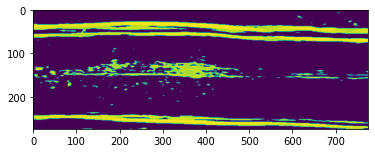

In [ ]:
plt.imshow(image_smooth)

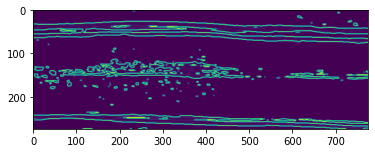

In [ ]:
image_edges = filters.prewitt(image_smooth)
plt.imshow(image_edges)

In [ ]:
gvy, gvx = np.gradient(image_edges)
gvf = np.dstack([gvx, gvy])

In [ ]:
s = np.linspace(0, 2*np.pi, 300)
x = 150 + 100*np.cos(s)
y = 350 + 100*np.sin(s)
init = np.array([x, y]).T

In [77]:
snake = active_contour(filters.gaussian(image_edges, 3, preserve_range=False),
                       init, alpha=0.01, beta=20, gamma=0.0001, max_iterations=20000)

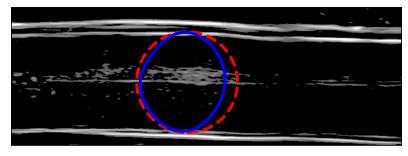

In [78]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(resized_image, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, image_eq.shape[1], image_eq.shape[0], 0])

plt.show()